### Load data

In [3]:
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import themachinethatgoesping as Ping

# data folder
folder = r"../unittest_data/"

# list raw data files
files = Ping.echosounders.index_functions.find_files(folder,['.all','.wcd'])
files.sort()

# create the file handler
cache_files = Ping.echosounders.index_functions.get_cache_file_paths(files)
fh = Ping.echosounders.kongsbergall.KongsbergAllFileHandler(files,cache_files,init=True)

# get pings that contain WCD
all_pings = Ping.pingprocessing.filter_pings.by_features(fh.get_pings(),['watercolumn.amplitudes'])

# check data with the WCI Viewer
viewer = Ping.pingprocessing.widgets.WCIViewer(all_pings)

Found 18 files
indexing files ⠐ 100% :00s<00m:00s] [..0871266855321420.all (1/18)]                               
indexing files ⠠ 100% :00s<00m:00s] [..3008643552583898.wcd (18/18)]                                
indexing files ⢀ 100% :00s<00m:00s] [Found: 729 datagrams in 18 files (10MB)]                                         
Initializing ping interface ⢀ 90% :00s<00m:00s] [Done]                                              


### Build an echogram

Text(0, 0.5, 'SampleNr')

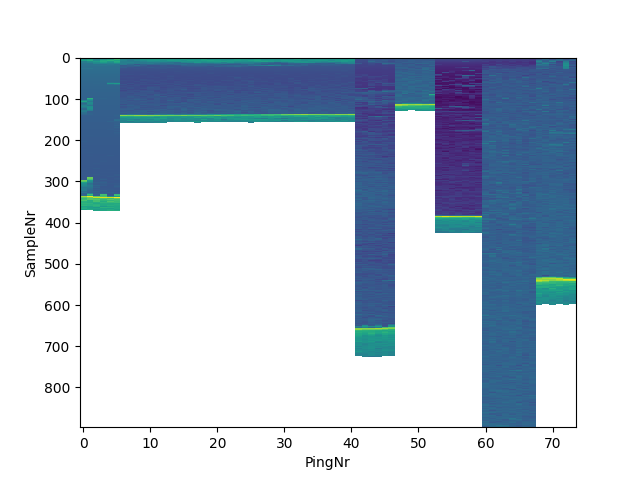

In [4]:
pss = Ping.echosounders.pingtools.PingSampleSelector()
pss.select_beam_range_by_angles(-3.5,3.5)

echodata = Ping.pingprocessing.watercolumn.echograms.EchoData.from_pings(all_pings, pss=pss)

image, extent = echodata.build_image()

#plot
fig,ax = Ping.pingprocessing.core.create_figure("echodata")
ax.imshow(image.transpose(),extent=extent,aspect='auto', interpolation='nearest')
ax.set_xlabel('PingNr')
ax.set_ylabel('SampleNr')

Text(0, 0.5, 'Depth (m)')

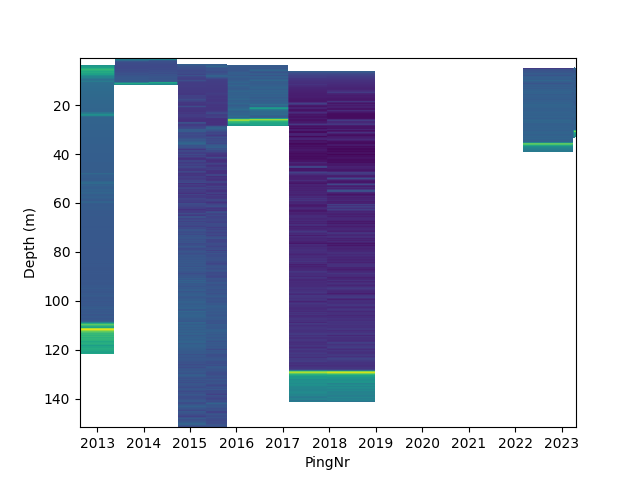

In [5]:
echodata.set_y_axis_depth()
echodata.set_x_axis_date_time(max_steps=1024)
image, extent = echodata.build_image()

#plot
fig,ax = Ping.pingprocessing.core.create_figure("echodata")
ax.imshow(image.transpose(),extent=extent,aspect='auto')
ax.set_xlabel('PingNr')
ax.set_ylabel('Depth (m)')

In [6]:
#split the survey to not include to large time differences
#make a new block if the difference between to consequtive ping is > 1000 seconds
pings_per_survey = Ping.pingprocessing.split_pings.by_time_difference(all_pings,1000)

for key,pings in pings_per_survey.items():
    print(key,len(pings))

0 6
1 35
2 6
3 6
4 7
5 8
6 6


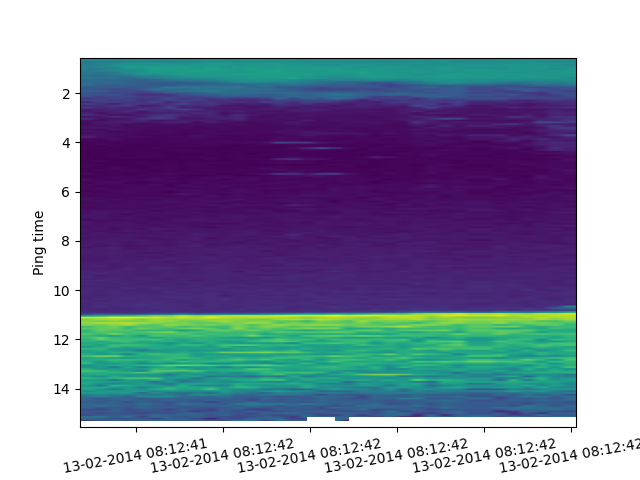

In [7]:
N=0
#make time/depths echogram for survey N

pings = pings_per_survey[1]
echodata = Ping.pingprocessing.watercolumn.echograms.EchoData.from_pings(pings)

echodata.set_y_axis_depth()
echodata.set_x_axis_date_time()
image, extent = echodata.build_image()

#plot
fig,ax = Ping.pingprocessing.core.create_figure("echodata")
ax.imshow(image.transpose(),extent=extent,aspect='auto')
ax.set_xlabel('Depth (m)')
ax.set_ylabel('Ping time')

#helper to make the date plotting better
Ping.pingprocessing.core.set_ax_timeformat(ax)